In [1]:
import pandas
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import Imputer

In [2]:
# read test data and training data
train_data = pandas.read_csv("all/train.csv")
test_data = pandas.read_csv("all/test.csv")

In [3]:
# Get a big idea of the data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [4]:
# check non integer value column
stringData = train_data.select_dtypes(include='object')

stringData.info()
stringData

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
MSZoning         1460 non-null object
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1452 non-null object
ExterQual        1460 non-null object
ExterCond        1460 non-null object
Foundation       1460 non-null object
BsmtQual         1423 non-null object
BsmtCond         1423 non-null object
BsmtExposure     1422

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
5,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,Shed,WD,Normal
6,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
7,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,...,Attchd,RFn,TA,TA,Y,NaN,NaN,Shed,WD,Normal
8,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,...,Detchd,Unf,Fa,TA,Y,NaN,NaN,NaN,WD,Abnorml
9,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,...,Attchd,RFn,Gd,TA,Y,NaN,NaN,NaN,WD,Normal


## Preprocessing
#### Drop ID

In [5]:
train_data.drop('Id',axis=1,inplace=True)

#### Visualize SalesPrice

/home/jason/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


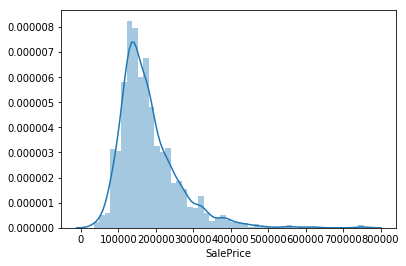

In [6]:
sns.distplot(train_data['SalePrice']);

#### Take log of the sales price

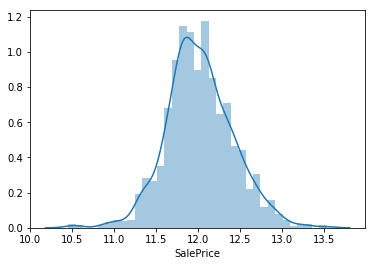

In [7]:
train_data.SalePrice = np.log1p(train_data.SalePrice)

sns.distplot(train_data['SalePrice']);

## Look at features

#### Check missing data

In [8]:
# check the missing data rate
train_data_na = (train_data.isnull().sum() / len(train_data)) * 100
train_data_na = train_data_na.drop(train_data_na[train_data_na == 0].index).sort_values(ascending=False)
missing_data = pandas.DataFrame({'Missing Ratio' :train_data_na})
missing_data

,Missing Ratio
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
FireplaceQu,47.260274
LotFrontage,17.739726
GarageYrBlt,5.547945
GarageType,5.547945
GarageFinish,5.547945
GarageQual,5.547945


#### According to data description， change the string value

In [9]:
# PoolQC with NaN means no pool, so we put None instead
train_data.PoolQC = train_data.PoolQC.fillna("None")
test_data.PoolQC = test_data.PoolQC.fillna("None")

In [10]:
# MiscFeature: Miscellaneous feature not covered in other categories
# NA means None, so we repaced with None
train_data.MiscFeature = train_data.MiscFeature.fillna("None")
test_data.MiscFeature = test_data.MiscFeature.fillna("None")

In [11]:
# If Alley is NA means there is no Alley access, so we change it to None
train_data.Alley = train_data.Alley.fillna("None")
test_data.Alley = test_data.Alley.fillna("None")

In [12]:
# If Fence is NA means there is no Fence
train_data.Fence = train_data.Fence.fillna("None")
test_data.Fence = test_data.Fence.fillna("None")

In [13]:
# If FireplaceQu is NA means there is no Fireplace
train_data.FireplaceQu = train_data.FireplaceQu.fillna("None")
test_data.FireplaceQu = test_data.FireplaceQu.fillna("None")

In [14]:
# If the house does not have a garage, GarageType GarageFinish GarageQual and GarageCond will be Na
for column in ("GarageType", "GarageFinish", "GarageQual", "GarageCond"):
    train_data[column] = train_data[column].fillna("None")
    test_data[column] = test_data[column] .fillna("None")

In [15]:
# If there is no basement, BsmtFinType2, BsmtExposure, BsmtFinType1, BsmtCond, BsmtQual will be Na,
for column in ("BsmtFinType2", "BsmtExposure", "BsmtFinType1", "BsmtCond", "BsmtQual"):
    train_data[column] = train_data[column].fillna("None")
    test_data[column] = test_data[column] .fillna("None")

In [16]:
# Masonry veneer type
train_data.MasVnrType = train_data.MasVnrType.fillna("None")
test_data.MasVnrType = test_data.MasVnrType.fillna("None")

In [17]:
# check the missing data rate
train_data_na = (train_data.isnull().sum() / len(train_data)) * 100
train_data_na = train_data_na.drop(train_data_na[train_data_na == 0].index).sort_values(ascending=False)
missing_data = pandas.DataFrame({'Missing Ratio' :train_data_na})
missing_data

,Missing Ratio
LotFrontage,17.739726
GarageYrBlt,5.547945
MasVnrArea,0.547945
Electrical,0.068493


In [18]:
test_data_na = (test_data.isnull().sum() / len(train_data)) * 100
test_data_na = test_data_na.drop(test_data_na[test_data_na == 0].index).sort_values(ascending=False)
missing_test_data = pandas.DataFrame({'Missing Ratio' :test_data_na})
missing_test_data

,Missing Ratio
LotFrontage,15.547945
GarageYrBlt,5.342466
MasVnrArea,1.027397
MSZoning,0.273973
Functional,0.136986
Utilities,0.136986
BsmtHalfBath,0.136986
BsmtFullBath,0.136986
BsmtFinSF1,0.068493
Exterior1st,0.068493


### Look deeper of the missing value

#### GrageYrBlt

In [19]:
print(np.isnan(train_data.GarageYrBlt).sum())
print(train_data.GarageType.value_counts())

81
Attchd     870
Detchd     387
BuiltIn     88
None        81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64


Looks like when there is no Garage, the GarageYrBlt will be nan

In [20]:
# since there is no garage, so we will set the year build at 0
train_data.GarageYrBlt = train_data.GarageYrBlt.fillna(0)
test_data.GarageYrBlt = test_data.GarageYrBlt.fillna(0)

# for testing data, GarageArea and GarageCars also has missing vlaue, we set them to 0 because they does not have garage
test_data.GarageArea = test_data.GarageArea.fillna(0)
test_data.GarageCars = test_data.GarageCars.fillna(0)


In [21]:
print(np.isnan(train_data.GarageYrBlt).sum())

0


#### MasVnrArea

In [22]:
print(np.isnan(train_data.MasVnrArea).sum())
print(train_data.MasVnrType.value_counts())

8
None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64


In [23]:
train_data["MasVnrArea"] = train_data["MasVnrArea"].fillna(0)
test_data["MasVnrArea"] = test_data['MasVnrArea'].fillna(0)

#### TotalBsmtSF and related in testing data

In [24]:
test_data["TotalBsmtSF"] = test_data['TotalBsmtSF'].fillna(0)
test_data["BsmtFinSF1"] = test_data['BsmtFinSF1'].fillna(0)
test_data["BsmtFinSF2"] = test_data['BsmtFinSF2'].fillna(0)
test_data["BsmtUnfSF"] = test_data['BsmtUnfSF'].fillna(0)


In [25]:
# check the missing data rate
train_data_na = (train_data.isnull().sum() / len(train_data)) * 100
train_data_na = train_data_na.drop(train_data_na[train_data_na == 0].index).sort_values(ascending=False)
missing_data = pandas.DataFrame({'Missing Ratio' :train_data_na})
missing_data

,Missing Ratio
LotFrontage,17.739726
Electrical,0.068493


In [26]:
test_data_na = (test_data.isnull().sum() / len(train_data)) * 100
test_data_na = test_data_na.drop(test_data_na[test_data_na == 0].index).sort_values(ascending=False)
missing_test_data = pandas.DataFrame({'Missing Ratio' :test_data_na})
missing_test_data

,Missing Ratio
LotFrontage,15.547945
MSZoning,0.273973
Functional,0.136986
BsmtHalfBath,0.136986
BsmtFullBath,0.136986
Utilities,0.136986
SaleType,0.068493
KitchenQual,0.068493
Exterior2nd,0.068493
Exterior1st,0.068493


## There are still some missing values. However, it does not make any sense if we just add None or 0. We want to use imputation. Before do Imputation, We need to encode those string features

In [27]:
list(train_data.select_dtypes(exclude=['int', 'float']).columns.values)

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [28]:
train_data.MSZoning.value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [29]:
train_data.MSZoning = train_data.MSZoning.map({'RL':0, 'RM':1, 'FV':2, 'RH':3, 'C (all)':4})
test_data.MSZoning = test_data.MSZoning.map({'RL':0, 'RM':1, 'FV':2, 'RH':3, 'C (all)':4})

In [30]:
train_data.Street = train_data.Street.map({'Grvl' : 1, 'Pave' : 2})
test_data.Street = test_data.Street.map({'Grvl' : 1, 'Pave' : 2})

In [31]:
train_data.Alley = train_data.Alley.map({'None':0, 'Grvl' : 1, 'Pave' : 2})
test_data.Alley = test_data.Alley.map({'None':0, 'Grvl' : 1, 'Pave' : 2})

In [32]:
train_data.LotShape = train_data.LotShape.map({"Reg" : 1, "IR1" : 2, "IR2" : 3, "IR3" : 4})
test_data.LotShape = test_data.LotShape.map({"Reg" : 1, "IR1" : 2, "IR2" : 3, "IR3" : 4})

In [33]:
train_data.LandContour = train_data.LandContour.map({
    'Lvl' : 1,
    'Bnk' : 2,
    'HLS' : 3,
    'Low' : 4
})
test_data.LandContour = test_data.LandContour.map({
    'Lvl' : 1,
    'Bnk' : 2,
    'HLS' : 3,
    'Low' : 4
})

In [34]:
train_data.Utilities = train_data.Utilities.map({
    'AllPub' : 1,
    'NoSewr' : 2,
    'NoSeWa' : 3,
    'ELO' :4
})
test_data.Utilities = test_data.Utilities.map({
    'AllPub' : 1,
    'NoSewr' : 2,
    'NoSeWa' : 3,
    'ELO' :4
})

In [35]:
train_data.LotConfig = train_data.LotConfig.map({
    'Inside' : 1,
    'Corner' : 2,
    'CulDSac' : 3,
    'FR2' : 4,
    'FR3' : 5
})
test_data.LotConfig = test_data.LotConfig.map({
    'Inside' : 1,
    'Corner' : 2,
    'CulDSac' : 3,
    'FR2' : 4,
    'FR3' : 5
})

In [36]:
train_data.LandSlope = train_data.LandSlope.map({
    'Gtl' : 3,
    'Mod' : 2,
    'Sev' : 1
})
test_data.LandSlope = test_data.LandSlope.map({
    'Gtl' : 3,
    'Mod' : 2,
    'Sev' : 1
})

In [37]:
Neighborhoodkeys =  train_data.Neighborhood.unique()
NeighborhoodMap = {}
i = 1
for key in Neighborhoodkeys:
    NeighborhoodMap[key] = i
    i += 1
print(NeighborhoodMap)

{'CollgCr': 1, 'Veenker': 2, 'Crawfor': 3, 'NoRidge': 4, 'Mitchel': 5, 'Somerst': 6, 'NWAmes': 7, 'OldTown': 8, 'BrkSide': 9, 'Sawyer': 10, 'NridgHt': 11, 'NAmes': 12, 'SawyerW': 13, 'IDOTRR': 14, 'MeadowV': 15, 'Edwards': 16, 'Timber': 17, 'Gilbert': 18, 'StoneBr': 19, 'ClearCr': 20, 'NPkVill': 21, 'Blmngtn': 22, 'BrDale': 23, 'SWISU': 24, 'Blueste': 25}


In [38]:
train_data.Neighborhood = train_data.Neighborhood.map(NeighborhoodMap)
test_data.Neighborhood = test_data.Neighborhood.map(NeighborhoodMap)

In [39]:
ConditionMap = {'Norm': 3, 'Feedr': 4, 'PosN': 2, 'Artery': 4, 'RRAe': 1, 'RRNn': 1, 'RRAn': 1, 'PosA': 2, 'RRNe': 1}

train_data.Condition1 = train_data.Condition1.map(ConditionMap)
train_data.Condition2 = train_data.Condition2.map(ConditionMap)
test_data.Condition1 = test_data.Condition1.map(ConditionMap)
test_data.Condition2 = test_data.Condition2.map(ConditionMap)

In [40]:
train_data.BldgType = train_data.BldgType.map({'1Fam': 5, '2FmCon' :4, 'Duplx' :3, 'TwnhsE': 2, 'TwnhsI':1})
test_data.BldgType = test_data.BldgType.map({'1Fam': 5, '2FmCon' :4, 'Duplx' :3, 'TwnhsE': 2, 'TwnhsI':1})

In [41]:
train_data.HouseStyle = train_data.HouseStyle.map({'2Story': 1, '1Story': 2, '1.5Fin': 3, '1.5Unf': 4, 'SFoyer': 5, 'SLvl': 6, '2.5Unf': 7, '2.5Fin': 8})
test_data.HouseStyle = test_data.HouseStyle.map({'2Story': 1, '1Story': 2, '1.5Fin': 3, '1.5Unf': 4, 'SFoyer': 5, 'SLvl': 6, '2.5Unf': 7, '2.5Fin': 8})

In [42]:
train_data.RoofStyle = train_data.RoofStyle.map({'Gable': 1, 'Hip': 2, 'Gambrel': 3, 'Mansard': 4, 'Flat': 5, 'Shed': 6})
test_data.RoofStyle = test_data.RoofStyle.map({'Gable': 1, 'Hip': 2, 'Gambrel': 3, 'Mansard': 4, 'Flat': 5, 'Shed': 6})

In [43]:
train_data.RoofMatl = train_data.RoofMatl.map({'CompShg': 1, 'WdShngl': 2, 'Metal': 3, 'WdShake': 4, 'Membran': 5, 'Tar&Grv': 6, 'Roll': 7, 'ClyTile': 8})
test_data.RoofMatl = test_data.RoofMatl.map({'CompShg': 1, 'WdShngl': 2, 'Metal': 3, 'WdShake': 4, 'Membran': 5, 'Tar&Grv': 6, 'Roll': 7, 'ClyTile': 8})

In [44]:
ExteriorMap = {'VinylSd': 1, 'MetalSd': 2, 'Wd Sdng': 3, 'HdBoard': 4, 'BrkFace': 5, 'WdShing': 6, 'CemntBd': 7, 'Plywood': 8, 'AsbShng': 9, 'Stucco': 10, 'BrkComm': 11, 'AsphShn': 12, 'Stone': 13, 'ImStucc': 14, 'CBlock': 15}
train_data.Exterior1st = train_data.Exterior1st.map(ExteriorMap)
train_data.Exterior2nd = train_data.Exterior2nd.map(ExteriorMap)
test_data.Exterior1st = test_data.Exterior1st.map(ExteriorMap)
test_data.Exterior2nd = test_data.Exterior2nd.map(ExteriorMap)

In [45]:
# since has none, so we just samplify this featrue
train_data.MasVnrType = train_data.MasVnrType.map({"BrkCmn" : 1, "BrkFace" : 1, "CBlock" : 1, "Stone" : 1, "None" : 0})
test_data.MasVnrType = test_data.MasVnrType.map({"BrkCmn" : 1, "BrkFace" : 1, "CBlock" : 1, "Stone" : 1, "None" : 0})

In [46]:
conditionMap = {"None" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5}

In [47]:
train_data.ExterCond = train_data.ExterCond.map(conditionMap)
test_data.ExterCond = test_data.ExterCond.map(conditionMap)
train_data.ExterQual = train_data.ExterQual.map(conditionMap)
test_data.ExterQual = test_data.ExterQual.map(conditionMap)
train_data.BsmtQual = train_data.BsmtQual.map(conditionMap)
test_data.BsmtQual = test_data.BsmtQual.map(conditionMap)
train_data.BsmtCond = train_data.BsmtCond.map(conditionMap)
test_data.BsmtCond = test_data.BsmtCond.map(conditionMap)
train_data.HeatingQC = train_data.HeatingQC.map(conditionMap)
test_data.HeatingQC = test_data.HeatingQC.map(conditionMap)
train_data.KitchenQual = train_data.KitchenQual.map(conditionMap)
test_data.KitchenQual = test_data.KitchenQual.map(conditionMap)
train_data.FireplaceQu = train_data.FireplaceQu.map(conditionMap)
test_data.FireplaceQu = test_data.FireplaceQu.map(conditionMap)
train_data.GarageQual = train_data.GarageQual.map(conditionMap)
test_data.GarageQual = test_data.GarageQual.map(conditionMap)
train_data.GarageCond = train_data.GarageCond.map(conditionMap)
test_data.GarageCond = test_data.GarageCond.map(conditionMap)
train_data.PoolQC = train_data.PoolQC.map(conditionMap)
test_data.PoolQC = test_data.PoolQC.map(conditionMap)


In [48]:
train_data.Foundation = train_data.Foundation.map({'PConc': 1, 'CBlock': 2, 'BrkTil': 3, 'Wood': 4, 'Slab': 5, 'Stone': 6})
test_data.Foundation = test_data.Foundation.map({'PConc': 1, 'CBlock': 2, 'BrkTil': 3, 'Wood': 4, 'Slab': 5, 'Stone': 6})



In [49]:
train_data.BsmtExposure = train_data.BsmtExposure.map({"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3, "None" : 0})
test_data.BsmtExposure = test_data.BsmtExposure.map({"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3, "None" : 0})

In [50]:
BsmtFinTypeMap = {"None" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, "ALQ" : 5, "GLQ" : 6}

In [51]:
train_data.BsmtFinType1 = train_data.BsmtFinType1.map(BsmtFinTypeMap)
train_data.BsmtFinType2 = train_data.BsmtFinType2.map(BsmtFinTypeMap)
test_data.BsmtFinType1 = test_data.BsmtFinType1.map(BsmtFinTypeMap)
test_data.BsmtFinType2 = test_data.BsmtFinType2.map(BsmtFinTypeMap)

In [52]:
train_data.Heating = train_data.Heating.map({'GasA': 1, 'GasW': 2, 'Grav': 3, 'Wall': 4, 'OthW': 5, 'Floor': 6})
test_data.Heating = test_data.Heating.map({'GasA': 1, 'GasW': 2, 'Grav': 3, 'Wall': 4, 'OthW': 5, 'Floor': 6})

In [53]:
train_data.CentralAir = train_data.CentralAir.map({'Y': 1, 'N': 0})
test_data.CentralAir = test_data.CentralAir.map({'Y': 1, 'N': 0})

In [54]:
train_data.Electrical = train_data.Electrical.map({'SBrkr': 1, 'FuseF': 2, 'FuseA': 3, 'FuseP': 4, 'Mix': 5})
test_data.Electrical = test_data.Electrical.map({'SBrkr': 1, 'FuseF': 2, 'FuseA': 3, 'FuseP': 4, 'Mix': 5})

In [55]:
train_data.Functional = train_data.Functional.map({'Typ':0, 'Min2':1, 'Min1':2, 'Mod':3, 'Maj1':4, 'Maj2':5, 'Sev':6})
test_data.Functional = test_data.Functional.map({'Typ':0, 'Min2':1, 'Min1':2, 'Mod':3, 'Maj1':4, 'Maj2':5, 'Sev':6})

In [56]:
train_data.GarageType = train_data.GarageType.map({'Attchd':1, 'Detchd':2, 'BuiltIn':3, 'None':0, 'Basement':4, 'CarPort':5, '2Types':6})
test_data.GarageType = test_data.GarageType.map({'Attchd':1, 'Detchd':2, 'BuiltIn':3, 'None':0, 'Basement':4, 'CarPort':5, '2Types':6})

In [57]:
train_data.GarageFinish = train_data.GarageFinish.map({'RFn': 1, 'Unf': 2, 'Fin': 3, 'None': 0})
test_data.GarageFinish = test_data.GarageFinish.map({'RFn': 1, 'Unf': 2, 'Fin': 3, 'None': 0})

In [58]:
train_data.PavedDrive = train_data.PavedDrive.map({'Y':3, 'N':1, 'P':2})
test_data.PavedDrive = test_data.PavedDrive.map({'Y':3, 'N':1, 'P':2})

In [59]:
train_data.Fence = train_data.Fence.map({'None':0, 'MnPrv':1, 'GdPrv':2, 'GdWo':3, 'MnWw':4})
test_data.Fence = test_data.Fence.map({'None':0, 'MnPrv':1, 'GdPrv':2, 'GdWo':3, 'MnWw':4})



In [60]:
train_data.MiscFeature = train_data.MiscFeature.map({'None':0, 'Shed':1, 'Othr':2, 'Gar2':3, 'TenC':4})
test_data.MiscFeature = test_data.MiscFeature.map({'None':0, 'Shed':1, 'Othr':2, 'Gar2':3, 'TenC':4})



In [61]:
train_data.SaleType = train_data.SaleType.map({'WD': 1, 'New': 2, 'COD': 3, 'ConLD': 4, 'ConLI': 5, 'CWD': 6, 'ConLw': 7, 'Con': 8, 'Oth': 9})
test_data.SaleType = test_data.SaleType.map({'WD': 1, 'New': 2, 'COD': 3, 'ConLD': 4, 'ConLI': 5, 'CWD': 6, 'ConLw': 7, 'Con': 8, 'Oth': 9})

In [62]:
train_data.SaleCondition = train_data.SaleCondition.map({'Normal': 1, 'Abnorml': 2, 'Partial': 3, 'AdjLand': 4, 'Alloca': 5, 'Family': 6})
test_data.SaleCondition = test_data.SaleCondition.map({'Normal': 1, 'Abnorml': 2, 'Partial': 3, 'AdjLand': 4, 'Alloca': 5, 'Family': 6})

In [63]:
correlated = train_data.corr()
correlated = correlated.loc['SalePrice']
correlated = correlated.sort_values(ascending=False)

print(correlated.head(15))


SalePrice       1.000000
OverallQual     0.817185
GrLivArea       0.700927
GarageCars      0.680625
ExterQual       0.678840
KitchenQual     0.667893
GarageArea      0.650888
BsmtQual        0.615804
TotalBsmtSF     0.612134
1stFlrSF        0.596981
FullBath        0.594771
YearBuilt       0.586570
YearRemodAdd    0.565608
FireplaceQu     0.546362
TotRmsAbvGrd    0.534422
Name: SalePrice, dtype: float64


# Modeling 

In [64]:
columnsSelected = ['SalePrice','OverallQual','GrLivArea','GarageCars','ExterQual','KitchenQual','GarageArea','BsmtQual','TotalBsmtSF','1stFlrSF', 'FullBath']

In [65]:
#train_data = train_data[columnsSelected]

In [66]:
#Numerical features should be normalized

In [67]:
print(np.shape(train_data) + np.shape(test_data))

(1460, 80, 1459, 80)


In [68]:
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.linear_model import ElasticNet, SGDRegressor, BayesianRidge
from sklearn.kernel_ridge import KernelRidge


In [69]:

Ridge=Ridge()

In [70]:
y_log=train_data['SalePrice']
train_data.drop('SalePrice',axis=1,inplace=True)


In [71]:
test_data.drop("Id",axis=1,inplace=True)

In [72]:
#Seperate Numerical value and Categorical value 

In [73]:
categ_features=train_data.select_dtypes(include=["object"]).columns
numerical_features=train_data.select_dtypes(exclude=["object"]).columns


In [74]:
train_data=train_data.fillna(train_data.median())

In [75]:
test_data=test_data.fillna(test_data.median())

In [76]:
from sklearn.model_selection import cross_val_score, train_test_split

In [77]:
# Partition the dataset in test + validation sets
X_train, X_test, y_train, y_test = train_test_split(train_data, y_log, test_size = 0.3, random_state = 0)
print("X_train : " + str(X_train.shape))
print("X_test : " + str(X_test.shape))
print("y_train : " + str(y_train.shape))
print("y_test : " + str(y_test.shape))
#Define 70% is used as testing data and 30% is test dataset.

X_train : (1022, 79)
X_test : (438, 79)
y_train : (1022,)
y_test : (438,)


Actually it dosen't make sense to impute categorical data as median but by this week, the goal is fit the rough model. So, we will deal with the problem later.

Numerical data should be normalized

In [78]:
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV

In [79]:
scorer=make_scorer(mean_squared_error,greater_is_better=False)

In [80]:
def rmse_cv_train(model):
    rmse=np.sqrt(-cross_val_score(model, X_train, y_train, scoring=scorer, cv=5))
    return (rmse)

def rmse_cv_test(model):
    rmse=np.sqrt(-cross_val_score(model, X_test, y_test, scoring=scorer, cv=5))
    return(rmse)

In [81]:
# Fit the Ridge regression model

ridge=RidgeCV(alphas=[0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 2,3, 10, 50])

In [82]:
ridge.fit(X_train,y_train)

RidgeCV(alphas=array([1.e-02, 3.e-02, 6.e-02, 1.e-01, 3.e-01, 6.e-01, 1.e+00, 2.e+00,
       3.e+00, 1.e+01, 5.e+01]),
    cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
    scoring=None, store_cv_values=False)

In [83]:
import pandas as pd

Best alpha : 60.0
Try again for more precision with alphas centered around 60.0


/home/jason/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best alpha : 42.0


/home/jason/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Ridge RMSE on testing set : 0.18979826235521535
Ridge RMSE on Test set : 0.18979826235521535


/home/jason/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


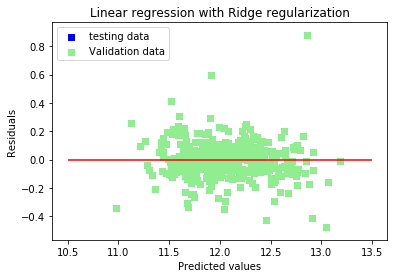

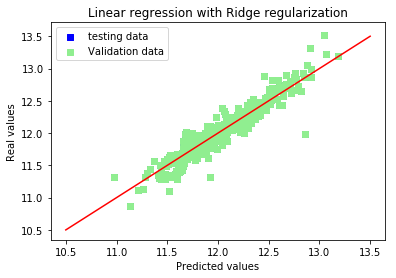

Ridge picked 78 features and eliminated the other 1 features


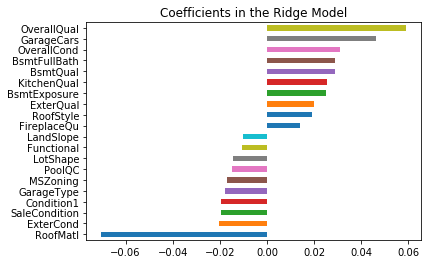

In [84]:
ridge = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60])
ridge.fit(X_test, y_test)
alpha = ridge.alpha_
print("Best alpha :", alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
ridge = RidgeCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4], 
                cv = 10)
ridge.fit(X_test, y_test)
alpha = ridge.alpha_
print("Best alpha :", alpha)

print("Ridge RMSE on testing set :", rmse_cv_test(ridge).mean())
print("Ridge RMSE on Test set :", rmse_cv_test(ridge).mean())
y_test_rdg = ridge.predict(X_test)
y_test_rdg = ridge.predict(X_test)

# Plot residuals
plt.scatter(y_test_rdg, y_test_rdg - y_test, c = "blue", marker = "s", label = "testing data")
plt.scatter(y_test_rdg, y_test_rdg - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_test_rdg, y_test, c = "blue", marker = "s", label = "testing data")
plt.scatter(y_test_rdg, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

# Plot important coefficients
coefs = pd.Series(ridge.coef_, index = X_test.columns)
print("Ridge picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Ridge Model")
plt.show()


The performance is pretty bad for the training dataset
If we are targeting around 2% then it should be around 0.11~ 0.12 for test dataet

Best l1_ratio : 0.3
Best alpha : 0.003
Try again for more precision with l1_ratio centered around 0.3
Best l1_ratio : 0.285
Best alpha : 0.003
Now try again for more precision on alpha, with l1_ratio fixed at 0.285 and alpha centered around 0.003
Best l1_ratio : 0.285
Best alpha : 0.003
ElasticNet RMSE on Training set : 0.14308682674140677
ElasticNet RMSE on Test set : 0.2121789768124401


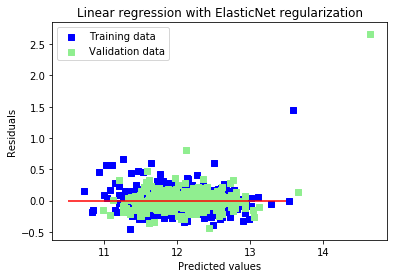

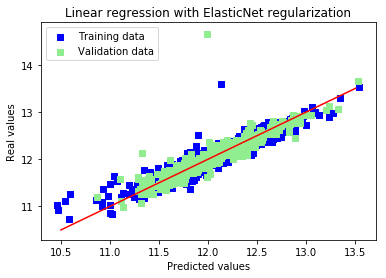

ElasticNet picked 70 features and eliminated the other 9 features


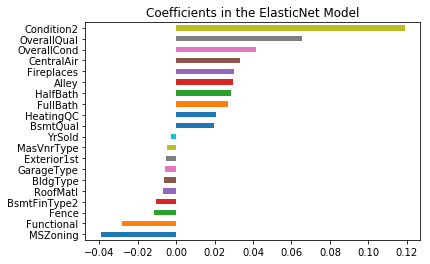

In [85]:
elasticNet = ElasticNetCV(l1_ratio = [0.1, 0.3, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95, 1],
                          alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 
                                    0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6], 
                          max_iter = 50000, cv = 10)
elasticNet.fit(X_train, y_train)
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

print("Try again for more precision with l1_ratio centered around " + str(ratio))
elasticNet = ElasticNetCV(l1_ratio = [ratio * .85, ratio * .9, ratio * .95, ratio, ratio * 1.05, ratio * 1.1, ratio * 1.15],
                          alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6], 
                          max_iter = 50000, cv = 10)
elasticNet.fit(X_train, y_train)
if (elasticNet.l1_ratio_ > 1):
    elasticNet.l1_ratio_ = 1    
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

print("Now try again for more precision on alpha, with l1_ratio fixed at " + str(ratio) + 
      " and alpha centered around " + str(alpha))
elasticNet = ElasticNetCV(l1_ratio = ratio,
                          alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, alpha * .9, 
                                    alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, 
                                    alpha * 1.35, alpha * 1.4], 
                          max_iter = 50000, cv = 10)
elasticNet.fit(X_train, y_train)
if (elasticNet.l1_ratio_ > 1):
    elasticNet.l1_ratio_ = 1    
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

print("ElasticNet RMSE on Training set :", rmse_cv_train(elasticNet).mean())
print("ElasticNet RMSE on Test set :", rmse_cv_test(elasticNet).mean())
y_train_ela = elasticNet.predict(X_train)
y_test_ela = elasticNet.predict(X_test)

# Plot residuals
plt.scatter(y_train_ela, y_train_ela - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_ela, y_test_ela - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with ElasticNet regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train, y_train_ela, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test, y_test_ela, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with ElasticNet regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

# Plot important coefficients
coefs = pd.Series(elasticNet.coef_, index = X_train.columns)
print("ElasticNet picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the ElasticNet Model")
plt.show()

Xgboost may be required .. to improve the perforamnce


The bad performance may derived from feature engineering... quadriatic

link[https://www.kaggle.com/dansbecker/xgboost] provide an tutorial for the xgboost model

In [86]:
import xgboost


In [87]:
model_xgb = xgboost.XGBRegressor(n_estimators=1000, learning_rate=0.1) 

In [88]:
model_xgb.fit(X_train, y_train, early_stopping_rounds=10, eval_set=[(X_test, y_test)])

[0]	validation_0-rmse:10.3843
Will train until validation_0-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:9.34903
[2]	validation_0-rmse:8.41734
[3]	validation_0-rmse:7.57783
[4]	validation_0-rmse:6.82222
[5]	validation_0-rmse:6.14518
[6]	validation_0-rmse:5.53299
[7]	validation_0-rmse:4.98412
[8]	validation_0-rmse:4.489
[9]	validation_0-rmse:4.04198
[10]	validation_0-rmse:3.6412
[11]	validation_0-rmse:3.27955
[12]	validation_0-rmse:2.95497
[13]	validation_0-rmse:2.66203
[14]	validation_0-rmse:2.39903
[15]	validation_0-rmse:2.16274
[16]	validation_0-rmse:1.94859
[17]	validation_0-rmse:1.75712
[18]	validation_0-rmse:1.5842
[19]	validation_0-rmse:1.4291
[20]	validation_0-rmse:1.28929
[21]	validation_0-rmse:1.16369
[22]	validation_0-rmse:1.0509
[23]	validation_0-rmse:0.949548
[24]	validation_0-rmse:0.858705
[25]	validation_0-rmse:0.777037
[26]	validation_0-rmse:0.703158
[27]	validation_0-rmse:0.637146
[28]	validation_0-rmse:0.577714
[29]	validation_0-rmse:0.524932
[30]	validatio

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [89]:
y_test_xgb_ela = model_xgb.predict(X_test)

In [90]:
merged = 0.7*y_test_ela + 0.3*y_test_xgb_ela

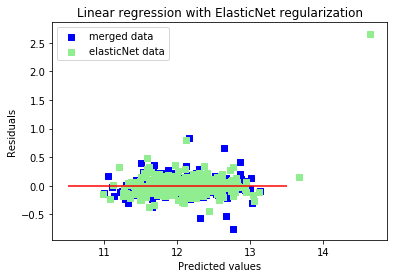

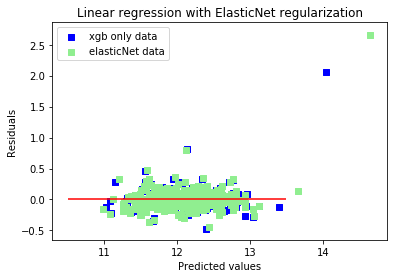

In [92]:

plt.scatter(y_test_xgb_ela, y_test_xgb_ela - y_test, c = "blue", marker = "s", label = "merged data")
plt.scatter(y_test_ela, y_test_ela - y_test, c = "lightgreen", marker = "s", label = "elasticNet data")
plt.title("Linear regression with ElasticNet regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()


plt.scatter(merged, merged - y_test, c = "blue", marker = "s", label = "xgb only data")
plt.scatter(y_test_ela, y_test_ela - y_test, c = "lightgreen", marker = "s", label = "elasticNet data")
plt.title("Linear regression with ElasticNet regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

In [100]:
import keras

In [102]:
kerasModel = keras.models.Sequential()

In [103]:
kerasModel.add(keras.layers.Dense(500, input_dim = X_train.shape[1],activation='relu'))
kerasModel.add(keras.layers.Dense(100,activation='relu'))
kerasModel.add(keras.layers.Dense(20,activation='relu'))
kerasModel.add(keras.layers.Dense(1))

In [104]:
kerasModel.compile(loss = "mse", optimizer = "adam")

In [107]:
callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', patience=5),
             keras.callbacks.ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]

In [108]:
kerasModel.fit(X_train, y_train, epochs=5000, validation_data = (X_test, y_test))

Train on 1022 samples, validate on 438 samples
Epoch 1/5000
 384/1022 [==========>...................] - ETA: 0s - loss: 0.0175

/home/jason/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


1022/1022 [==============================] - 0s 327us/step - loss: 0.0171 - val_loss: 0.0230
Epoch 2/5000
1022/1022 [==============================] - 0s 169us/step - loss: 0.0194 - val_loss: 0.0255
Epoch 3/5000
1022/1022 [==============================] - 0s 151us/step - loss: 0.0189 - val_loss: 0.0270
Epoch 4/5000
1022/1022 [==============================] - 0s 129us/step - loss: 0.0164 - val_loss: 0.0241
Epoch 5/5000
1022/1022 [==============================] - 0s 129us/step - loss: 0.0160 - val_loss: 0.0236
Epoch 6/5000
1022/1022 [==============================] - 0s 172us/step - loss: 0.0171 - val_loss: 0.0233
Epoch 7/5000
1022/1022 [==============================] - 0s 131us/step - loss: 0.0207 - val_loss: 0.0290
Epoch 8/5000
1022/1022 [==============================] - 0s 132us/step - loss: 0.0162 - val_loss: 0.0221
Epoch 9/5000
1022/1022 [==============================] - 0s 100us/step - loss: 0.0178 - val_loss: 0.0242
Epoch 10/5000
1022/1022 [==============================] - 

Epoch 78/5000
1022/1022 [==============================] - 0s 169us/step - loss: 0.0173 - val_loss: 0.0346
Epoch 79/5000
1022/1022 [==============================] - 0s 185us/step - loss: 0.0333 - val_loss: 0.0382
Epoch 80/5000
1022/1022 [==============================] - 0s 125us/step - loss: 0.0196 - val_loss: 0.0274
Epoch 81/5000
1022/1022 [==============================] - 0s 139us/step - loss: 0.0171 - val_loss: 0.0272
Epoch 82/5000
1022/1022 [==============================] - 0s 129us/step - loss: 0.0213 - val_loss: 0.0278
Epoch 83/5000
1022/1022 [==============================] - 0s 121us/step - loss: 0.0218 - val_loss: 0.0255
Epoch 84/5000
1022/1022 [==============================] - 0s 88us/step - loss: 0.0167 - val_loss: 0.0290
Epoch 85/5000
1022/1022 [==============================] - 0s 366us/step - loss: 0.0176 - val_loss: 0.0304
Epoch 86/5000
1022/1022 [==============================] - 0s 115us/step - loss: 0.0188 - val_loss: 0.0304
Epoch 87/5000
1022/1022 [=============

1022/1022 [==============================] - 0s 124us/step - loss: 0.0209 - val_loss: 0.0369
Epoch 155/5000
1022/1022 [==============================] - 0s 105us/step - loss: 0.0245 - val_loss: 0.0262
Epoch 156/5000
1022/1022 [==============================] - 0s 103us/step - loss: 0.0193 - val_loss: 0.0303
Epoch 157/5000
1022/1022 [==============================] - 0s 295us/step - loss: 0.0202 - val_loss: 0.0265
Epoch 158/5000
1022/1022 [==============================] - 0s 104us/step - loss: 0.0187 - val_loss: 0.0267
Epoch 159/5000
1022/1022 [==============================] - 0s 117us/step - loss: 0.0209 - val_loss: 0.0287
Epoch 160/5000
1022/1022 [==============================] - 0s 113us/step - loss: 0.0368 - val_loss: 0.0322
Epoch 161/5000
1022/1022 [==============================] - 0s 113us/step - loss: 0.0236 - val_loss: 0.0390
Epoch 162/5000
1022/1022 [==============================] - 0s 110us/step - loss: 0.0357 - val_loss: 0.0745
Epoch 163/5000
1022/1022 [=================

1022/1022 [==============================] - 0s 148us/step - loss: 0.0147 - val_loss: 0.0228
Epoch 231/5000
1022/1022 [==============================] - 0s 98us/step - loss: 0.0156 - val_loss: 0.0232
Epoch 232/5000
1022/1022 [==============================] - 0s 137us/step - loss: 0.0162 - val_loss: 0.0242
Epoch 233/5000
1022/1022 [==============================] - 0s 131us/step - loss: 0.0168 - val_loss: 0.0273
Epoch 234/5000
1022/1022 [==============================] - 0s 89us/step - loss: 0.0162 - val_loss: 0.0281
Epoch 235/5000
1022/1022 [==============================] - 0s 134us/step - loss: 0.0148 - val_loss: 0.0242
Epoch 236/5000
1022/1022 [==============================] - 0s 298us/step - loss: 0.0174 - val_loss: 0.0224
Epoch 237/5000
1022/1022 [==============================] - 0s 213us/step - loss: 0.0182 - val_loss: 0.0234
Epoch 238/5000
1022/1022 [==============================] - 0s 157us/step - loss: 0.0209 - val_loss: 0.0407
Epoch 239/5000
1022/1022 [===================

1022/1022 [==============================] - 0s 166us/step - loss: 0.0184 - val_loss: 0.0221
Epoch 307/5000
1022/1022 [==============================] - 0s 129us/step - loss: 0.0170 - val_loss: 0.0228
Epoch 308/5000
1022/1022 [==============================] - 0s 130us/step - loss: 0.0181 - val_loss: 0.0276
Epoch 309/5000
1022/1022 [==============================] - 0s 83us/step - loss: 0.0177 - val_loss: 0.0231
Epoch 310/5000
1022/1022 [==============================] - 0s 136us/step - loss: 0.0152 - val_loss: 0.0226
Epoch 311/5000
1022/1022 [==============================] - 0s 165us/step - loss: 0.0191 - val_loss: 0.0319
Epoch 312/5000
1022/1022 [==============================] - 0s 101us/step - loss: 0.0184 - val_loss: 0.0325
Epoch 313/5000
1022/1022 [==============================] - 0s 201us/step - loss: 0.0196 - val_loss: 0.0283
Epoch 314/5000
1022/1022 [==============================] - 0s 130us/step - loss: 0.0223 - val_loss: 0.0228
Epoch 315/5000
1022/1022 [==================

1022/1022 [==============================] - 0s 99us/step - loss: 0.0167 - val_loss: 0.0354
Epoch 383/5000
1022/1022 [==============================] - 0s 313us/step - loss: 0.0153 - val_loss: 0.0234
Epoch 384/5000
1022/1022 [==============================] - 0s 110us/step - loss: 0.0144 - val_loss: 0.0257
Epoch 385/5000
1022/1022 [==============================] - 0s 114us/step - loss: 0.0160 - val_loss: 0.0294
Epoch 386/5000
1022/1022 [==============================] - 0s 139us/step - loss: 0.0199 - val_loss: 0.0298
Epoch 387/5000
1022/1022 [==============================] - 0s 118us/step - loss: 0.0207 - val_loss: 0.0299
Epoch 388/5000
1022/1022 [==============================] - 0s 144us/step - loss: 0.0224 - val_loss: 0.0279
Epoch 389/5000
1022/1022 [==============================] - 0s 127us/step - loss: 0.0186 - val_loss: 0.0407
Epoch 390/5000
1022/1022 [==============================] - 0s 122us/step - loss: 0.0186 - val_loss: 0.0220
Epoch 391/5000
1022/1022 [==================

1022/1022 [==============================] - 0s 96us/step - loss: 0.0267 - val_loss: 0.3823
Epoch 459/5000
1022/1022 [==============================] - 0s 134us/step - loss: 0.0448 - val_loss: 0.1921
Epoch 460/5000
1022/1022 [==============================] - 0s 109us/step - loss: 0.0436 - val_loss: 0.1501
Epoch 461/5000
1022/1022 [==============================] - 0s 151us/step - loss: 0.0220 - val_loss: 0.2489
Epoch 462/5000
1022/1022 [==============================] - 0s 100us/step - loss: 0.0216 - val_loss: 0.4102
Epoch 463/5000
1022/1022 [==============================] - 0s 153us/step - loss: 0.0192 - val_loss: 0.3608
Epoch 464/5000
1022/1022 [==============================] - 0s 105us/step - loss: 0.0177 - val_loss: 0.3525
Epoch 465/5000
1022/1022 [==============================] - 0s 116us/step - loss: 0.0169 - val_loss: 0.2971
Epoch 466/5000
1022/1022 [==============================] - 0s 92us/step - loss: 0.0176 - val_loss: 0.4022
Epoch 467/5000
1022/1022 [===================

1022/1022 [==============================] - 0s 149us/step - loss: 0.0477 - val_loss: 0.0544
Epoch 535/5000
1022/1022 [==============================] - 0s 110us/step - loss: 0.0350 - val_loss: 0.0739
Epoch 536/5000
1022/1022 [==============================] - 0s 123us/step - loss: 0.1003 - val_loss: 0.0452
Epoch 537/5000
1022/1022 [==============================] - 0s 105us/step - loss: 0.0181 - val_loss: 0.0397
Epoch 538/5000
1022/1022 [==============================] - 0s 111us/step - loss: 0.0145 - val_loss: 0.0415
Epoch 539/5000
1022/1022 [==============================] - 0s 112us/step - loss: 0.0142 - val_loss: 0.0431
Epoch 540/5000
1022/1022 [==============================] - 0s 111us/step - loss: 0.0137 - val_loss: 0.0395
Epoch 541/5000
1022/1022 [==============================] - 0s 308us/step - loss: 0.0145 - val_loss: 0.0424
Epoch 542/5000
1022/1022 [==============================] - 0s 104us/step - loss: 0.0134 - val_loss: 0.0408
Epoch 543/5000
1022/1022 [=================

1022/1022 [==============================] - 0s 143us/step - loss: 0.0246 - val_loss: 0.0246
Epoch 611/5000
1022/1022 [==============================] - 0s 134us/step - loss: 0.0257 - val_loss: 0.0246
Epoch 612/5000
1022/1022 [==============================] - 0s 445us/step - loss: 0.0246 - val_loss: 0.0278
Epoch 613/5000
1022/1022 [==============================] - 0s 134us/step - loss: 0.0205 - val_loss: 0.0252
Epoch 614/5000
1022/1022 [==============================] - 0s 105us/step - loss: 0.0217 - val_loss: 0.0250
Epoch 615/5000
1022/1022 [==============================] - 0s 151us/step - loss: 0.0193 - val_loss: 0.0234
Epoch 616/5000
1022/1022 [==============================] - 0s 145us/step - loss: 0.0188 - val_loss: 0.0229
Epoch 617/5000
1022/1022 [==============================] - 0s 113us/step - loss: 0.0196 - val_loss: 0.0261
Epoch 618/5000
1022/1022 [==============================] - 0s 178us/step - loss: 0.0174 - val_loss: 0.0260
Epoch 619/5000
1022/1022 [=================

1022/1022 [==============================] - 0s 129us/step - loss: 0.0156 - val_loss: 0.0218
Epoch 687/5000
1022/1022 [==============================] - 0s 133us/step - loss: 0.0156 - val_loss: 0.0247
Epoch 688/5000
1022/1022 [==============================] - 0s 103us/step - loss: 0.0195 - val_loss: 0.0214
Epoch 689/5000
1022/1022 [==============================] - 0s 135us/step - loss: 0.0155 - val_loss: 0.0240
Epoch 690/5000
1022/1022 [==============================] - 0s 103us/step - loss: 0.0212 - val_loss: 0.0231
Epoch 691/5000
1022/1022 [==============================] - 0s 172us/step - loss: 0.0155 - val_loss: 0.0273
Epoch 692/5000
1022/1022 [==============================] - 0s 192us/step - loss: 0.0193 - val_loss: 0.0221
Epoch 693/5000
1022/1022 [==============================] - 0s 209us/step - loss: 0.0160 - val_loss: 0.0281
Epoch 694/5000
1022/1022 [==============================] - 0s 105us/step - loss: 0.0185 - val_loss: 0.0262
Epoch 695/5000
1022/1022 [=================

1022/1022 [==============================] - 0s 174us/step - loss: 0.0195 - val_loss: 0.0230
Epoch 763/5000
1022/1022 [==============================] - 0s 81us/step - loss: 0.0186 - val_loss: 0.0225
Epoch 764/5000
1022/1022 [==============================] - 0s 122us/step - loss: 0.0154 - val_loss: 0.0218
Epoch 765/5000
1022/1022 [==============================] - 0s 89us/step - loss: 0.0171 - val_loss: 0.0265
Epoch 766/5000
1022/1022 [==============================] - 0s 109us/step - loss: 0.0184 - val_loss: 0.0266
Epoch 767/5000
1022/1022 [==============================] - 0s 136us/step - loss: 0.0173 - val_loss: 0.0210
Epoch 768/5000
1022/1022 [==============================] - 0s 165us/step - loss: 0.0245 - val_loss: 0.0402
Epoch 769/5000
1022/1022 [==============================] - 0s 238us/step - loss: 0.0226 - val_loss: 0.0460
Epoch 770/5000
1022/1022 [==============================] - 0s 191us/step - loss: 0.0171 - val_loss: 0.0243
Epoch 771/5000
1022/1022 [===================

KeyboardInterrupt: 

In [129]:
y_test_nn_ela = kerasModel.predict(X_test)

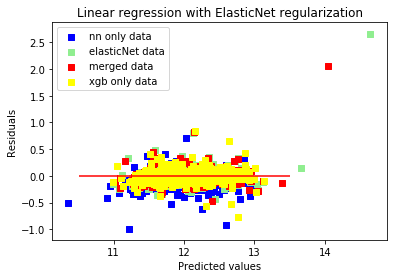

In [127]:
plt.scatter(y_test_nn_ela.ravel(), y_test_nn_ela.ravel() - y_test, c = "blue", marker = "s", label = "nn only data")
plt.scatter(y_test_ela, y_test_ela - y_test, c = "lightgreen", marker = "s", label = "elasticNet data")
plt.scatter(merged, merged - y_test, c = "red", marker = "s", label = "merged data")
plt.scatter(y_test_xgb_ela, y_test_xgb_ela - y_test, c = "yellow", marker = "s", label = "xgb only data")
plt.title("Linear regression with ElasticNet regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

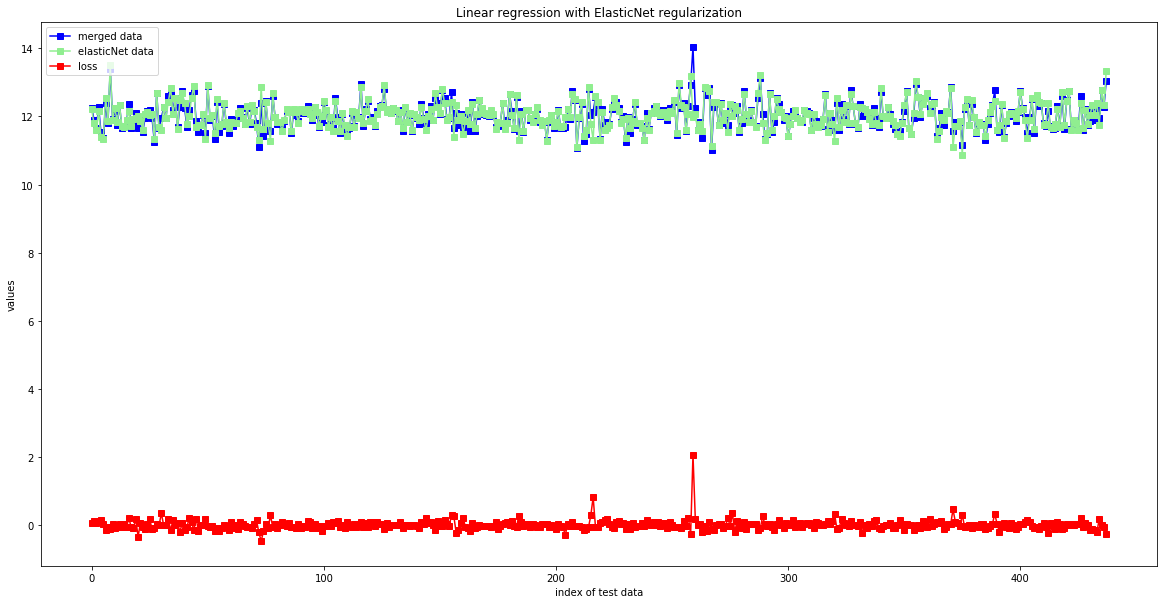

0.0866143439651


In [157]:
plt.figure(figsize=(20, 10))
plt.plot(range(len(X_test)), merged, c = "blue", marker = "s", label = "merged data")
plt.plot(range(len(X_test)), y_test, c = "lightgreen", marker = "s", label = "elasticNet data")
plt.plot(range(len(X_test)), merged - y_test, c = "red", marker = "s", label = "loss")
plt.title("Linear regression with ElasticNet regularization")
plt.xlabel("index of test data")
plt.ylabel("values")
plt.legend(loc = "upper left")
plt.show()
print(np.mean(np.abs(merged - y_test)))

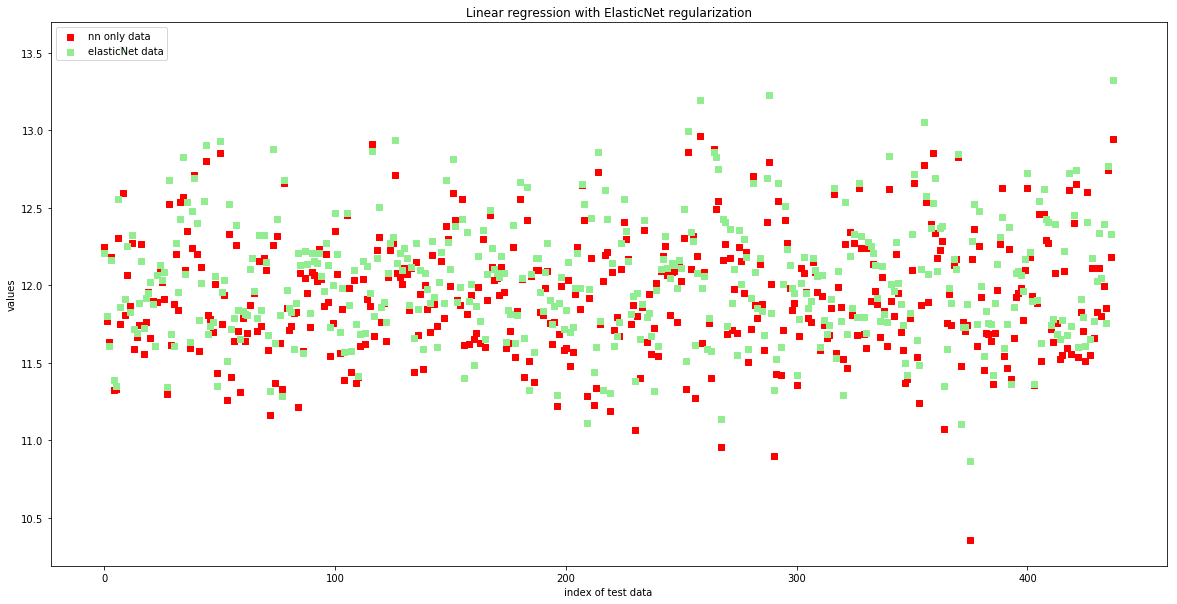

0.13149011608436417


In [160]:
plt.figure(figsize=(20, 10))
plt.scatter(range(len(X_test)), y_test_nn_ela, c = "red", marker = "s", label = "nn only data")
plt.scatter(range(len(X_test)), y_test, c = "lightgreen", marker = "s", label = "elasticNet data")
plt.title("Linear regression with ElasticNet regularization")
plt.xlabel("index of test data")
plt.ylabel("values")
plt.legend(loc = "upper left")
plt.show()
print(np.mean(np.abs(y_test_nn_ela.ravel() - y_test)))

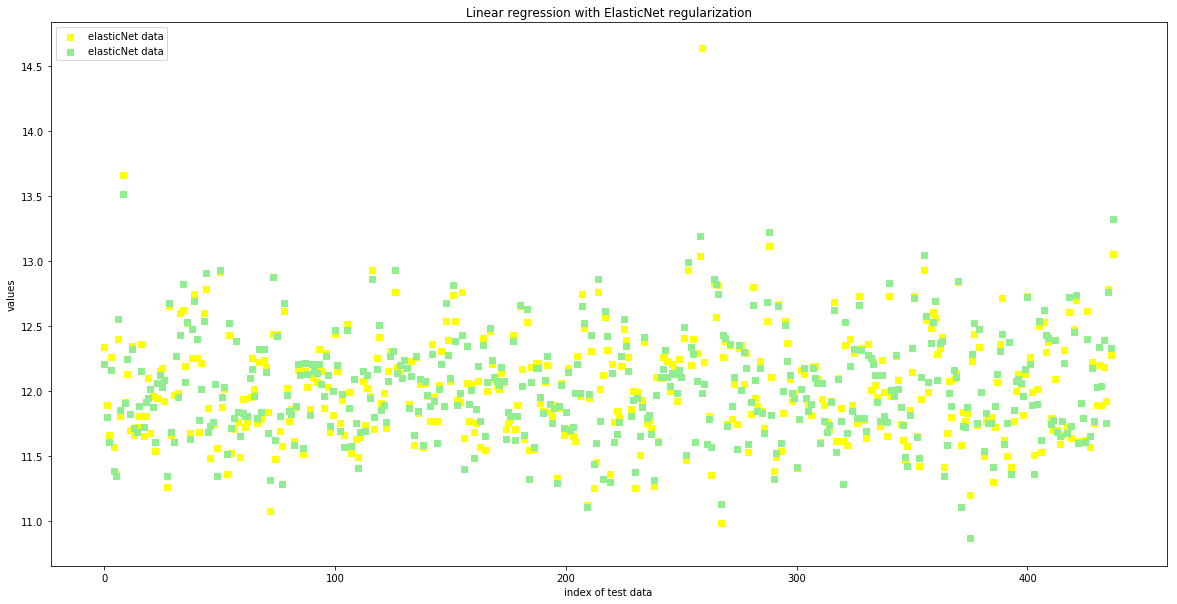

0.09370221565242766


In [161]:
plt.figure(figsize=(20, 10))
plt.scatter(range(len(X_test)), y_test_ela, c = "yellow", marker = "s", label = "elasticNet data")
plt.scatter(range(len(X_test)), y_test, c = "lightgreen", marker = "s", label = "elasticNet data")
plt.title("Linear regression with ElasticNet regularization")
plt.xlabel("index of test data")
plt.ylabel("values")
plt.legend(loc = "upper left")
plt.show()
print(np.mean(np.abs(y_test_ela - y_test)))

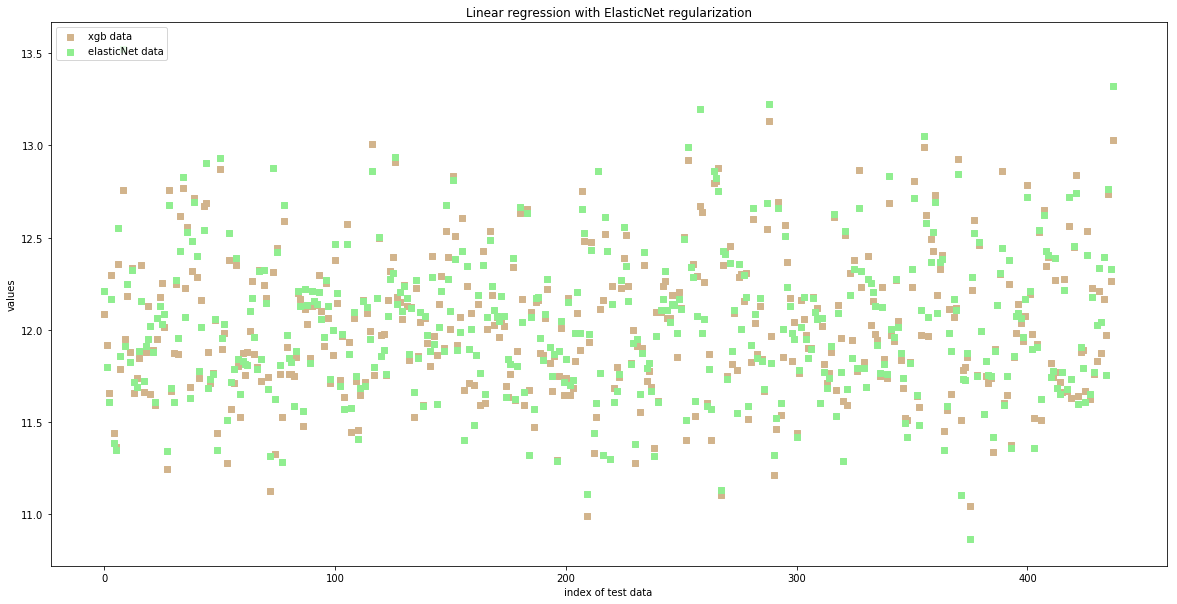

0.08437389511858938


In [162]:
plt.figure(figsize=(20, 10))
plt.scatter(range(len(X_test)), y_test_xgb_ela, c = "tan", marker = "s", label = "xgb data")
plt.scatter(range(len(X_test)), y_test, c = "lightgreen", marker = "s", label = "elasticNet data")
plt.title("Linear regression with ElasticNet regularization")
plt.xlabel("index of test data")
plt.ylabel("values")
plt.legend(loc = "upper left")
plt.show()
print(np.mean(np.abs(y_test_xgb_ela - y_test)))